In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
employee_data=pd.read_csv('/content/Employee.csv')
employee_data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [ ]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

In [ ]:
employee_data.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74493.000000,74498.000000,74492.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832978,49.991584,1.650365,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995303,28.513611,1.553660,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [ ]:
employee_data.isnull().sum()

,0
Employee ID,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,4
Job Satisfaction,0
Performance Rating,4
Number of Promotions,5


In [ ]:
employee_data.duplicated().sum()

0

In [ ]:
employee_data.drop_duplicates()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0.0,...,0.0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
74494,47175,30,Female,15,Education,3856,Good,Medium,Average,2.0,...,0.0,Entry,Medium,20,No,No,No,Good,Medium,Left
74495,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0.0,...,4.0,Mid,Small,7,No,No,No,Good,High,Left
74496,9554,18,Male,4,Education,5276,Fair,High,Average,0.0,...,3.0,Mid,Large,5,No,No,No,Poor,High,Stayed


In [ ]:
employee_data.shape

(74498, 24)

In [ ]:
employee_data.dtypes

,0
Employee ID,int64
Age,int64
Gender,object
Years at Company,int64
Job Role,object
Monthly Income,int64
Work-Life Balance,object
Job Satisfaction,object
Performance Rating,object
Number of Promotions,float64


In [ ]:
employee_data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [ ]:
employee_data.nunique()

,0
Employee ID,74498
Age,42
Gender,2
Years at Company,51
Job Role,5
Monthly Income,9842
Work-Life Balance,4
Job Satisfaction,4
Performance Rating,4
Number of Promotions,5


In [ ]:
employee_data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [ ]:
# Check for missing values
missing_values = employee_data.isnull().sum()


In [ ]:
# Display columns with missing values
missing_values[missing_values > 0]


,0
Work-Life Balance,4
Performance Rating,4
Number of Promotions,5
Education Level,5
Marital Status,4
Number of Dependents,6
Job Level,5
Company Size,2
Remote Work,3
Employee Recognition,2


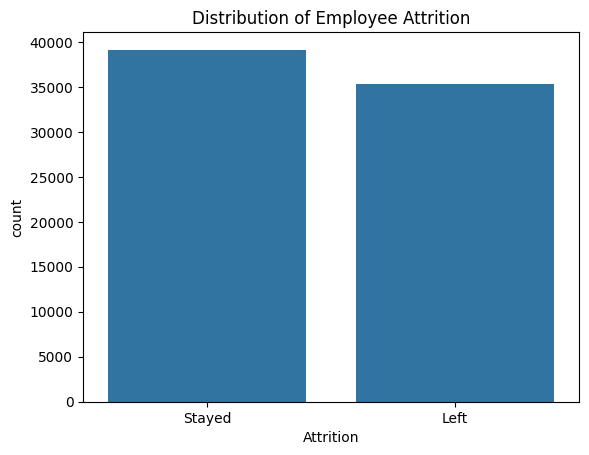

In [ ]:
# Plot the distribution of the 'Attrition' column
sns.countplot(x='Attrition', data=employee_data)
plt.title('Distribution of Employee Attrition')
plt.show()


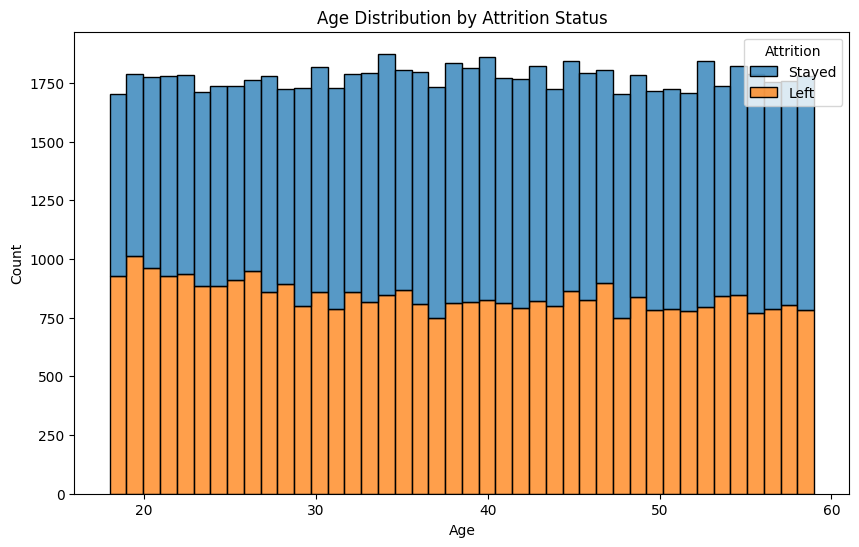

In [ ]:
# Plot the relationship between 'Attrition' and 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(data=employee_data, x='Age', hue='Attrition', multiple='stack')
plt.title('Age Distribution by Attrition Status')
plt.show()


In [ ]:
for column in ['Work-Life Balance', 'Performance Rating', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Employee Recognition']:
    employee_data[column].fillna(employee_data[column].mode()[0], inplace=True)


In [ ]:
for column in ['Number of Promotions', 'Number of Dependents']:
    employee_data[column].fillna(employee_data[column].median(), inplace=True)

In [ ]:
# Check for duplicate rows
duplicate_rows = employee_data.duplicated()


In [ ]:
# Remove duplicate rows
employee_data_cleaned = employee_data[~duplicate_rows]


<Axes: >

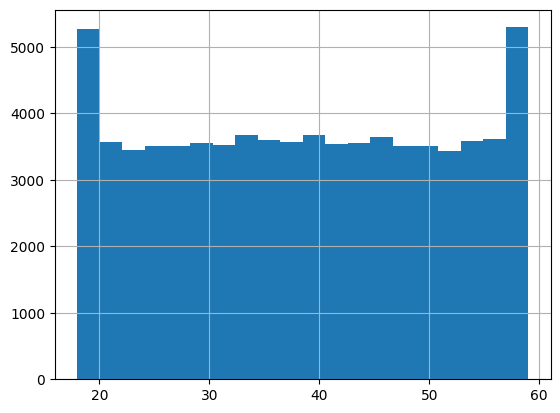

In [ ]:
# Plot histogram of 'Age'
employee_data_cleaned['Age'].hist(bins=20)


<Axes: xlabel='Years at Company', ylabel='Monthly Income'>

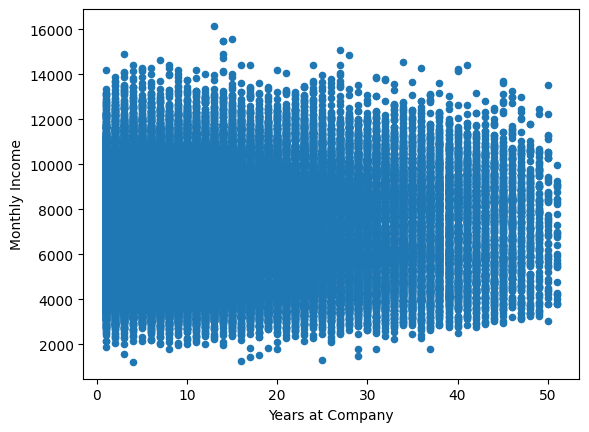

In [ ]:
# Plot scatter plot for 'Years at Company' vs. 'Monthly Income'
employee_data_cleaned.plot.scatter(x='Years at Company', y='Monthly Income')


In [ ]:
print(correlation_matrix)

                            Employee ID       Age  Years at Company  \
Employee ID                    1.000000  0.003534          0.000441   
Age                            0.003534  1.000000          0.537318   
Years at Company               0.000441  0.537318          1.000000   
Monthly Income                 0.000331 -0.001750         -0.005971   
Number of Promotions           0.006385  0.000656          0.000948   
Distance from Home             0.008186 -0.004586         -0.004835   
Number of Dependents          -0.004039  0.003650          0.004393   
Company Tenure                -0.003281  0.236337          0.442580   
Income per Year at Company    -0.000996 -0.285174         -0.641835   

                            Monthly Income  Number of Promotions  \
Employee ID                       0.000331              0.006385   
Age                              -0.001750              0.000656   
Years at Company                 -0.005971              0.000948   
Monthly Income   

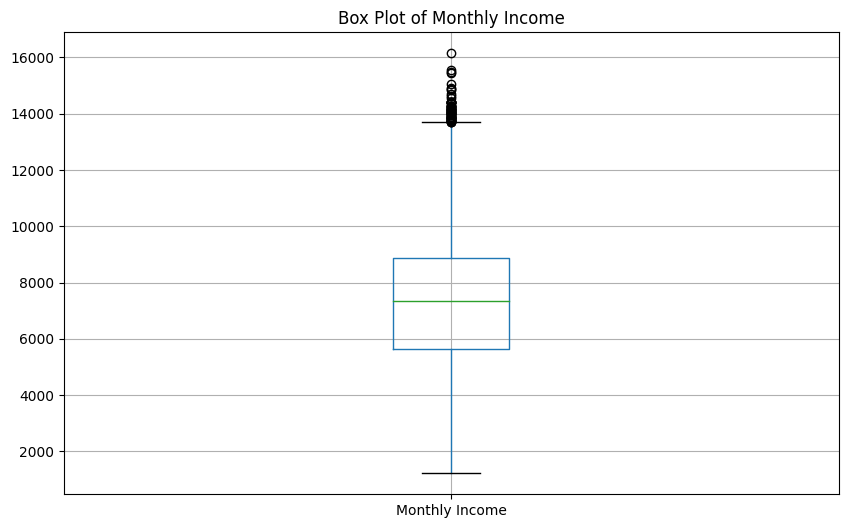

In [ ]:
# Box plot to detect outliers in 'Monthly Income'
plt.figure(figsize=(10, 6))
employee_data_cleaned.boxplot(column='Monthly Income')
plt.title('Box Plot of Monthly Income')
plt.show()


In [ ]:
# Identify outliers using the IQR method
Q1 = employee_data_cleaned['Monthly Income'].quantile(0.25)
Q3 = employee_data_cleaned['Monthly Income'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = employee_data_cleaned[(employee_data_cleaned['Monthly Income'] < lower_bound) |
                                 (employee_data_cleaned['Monthly Income'] > upper_bound)]


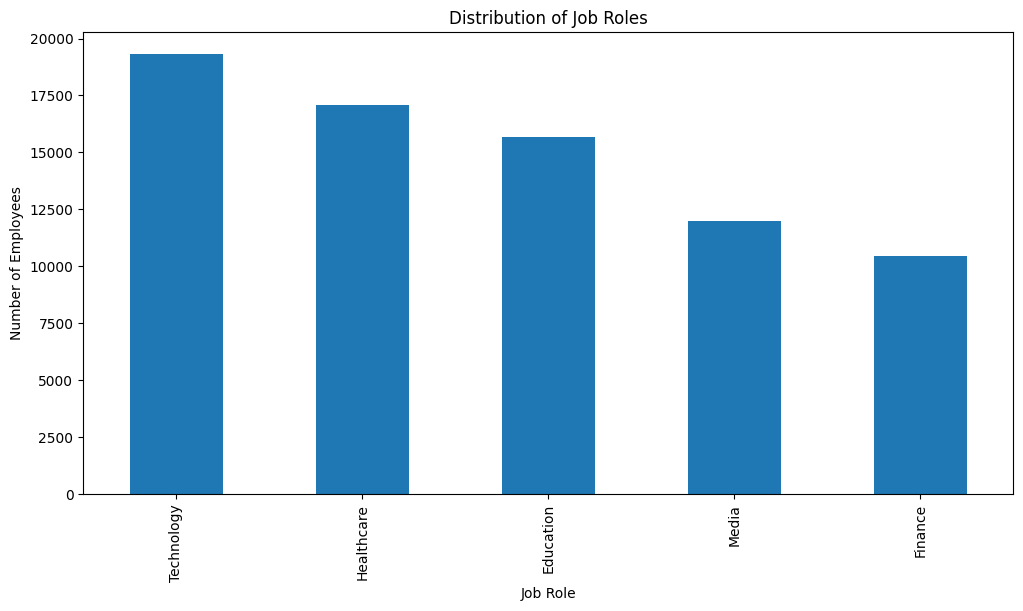

In [ ]:
# Bar plot for the distribution of Job Roles
plt.figure(figsize=(12, 6))
employee_data_cleaned['Job Role'].value_counts().plot(kind='bar')
plt.title('Distribution of Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Number of Employees')
plt.show()


In [ ]:
numerical_data = employee_data_cleaned.select_dtypes(include=['float', 'int'])

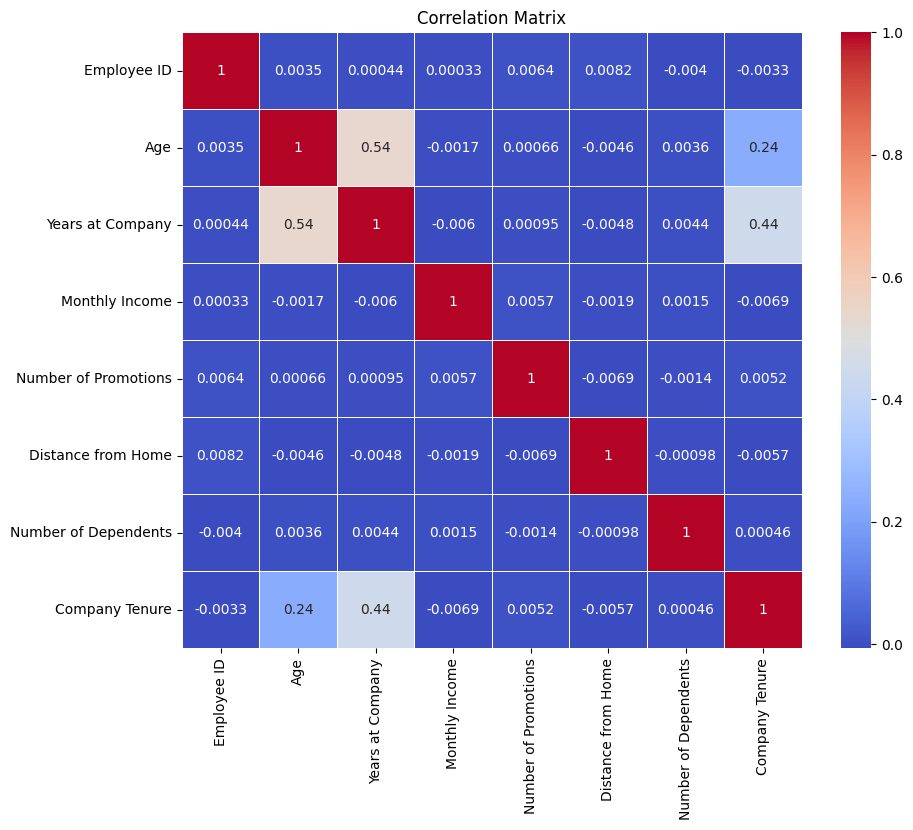

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Create a new feature 'Income per Year at Company'
employee_data_cleaned['Income per Year at Company'] = employee_data_cleaned['Monthly Income'] / (employee_data_cleaned['Years at Company'] + 1)


In [ ]:
employee_data_cleaned.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition,Income per Year at Company
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed,269.500000
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,Mid,Medium,21,No,No,No,Fair,Low,Stayed,1106.800000
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,Mid,Medium,74,No,No,No,Poor,Low,Stayed,741.727273
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,Mid,Small,50,Yes,No,No,Good,Medium,Stayed,498.625000
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,Senior,Medium,68,No,No,No,Fair,Medium,Stayed,114.785714


In [ ]:
# Select relevant features for modeling
selected_features = employee_data_cleaned[['Age', 'Monthly Income', 'Years at Company', 'Job Role', 'Income per Year at Company']]


In [ ]:
insights = {
    'Highest Paid Job Role': employee_data_cleaned.groupby('Job Role')['Monthly Income'].mean().idxmax(),
    'Most Common Job Role': employee_data_cleaned['Job Role'].mode()[0],
    'Average Income': employee_data_cleaned['Monthly Income'].mean(),
    'Most Experienced Employee': employee_data_cleaned.loc[employee_data_cleaned['Years at Company'].idxmax()]
}

insights

{'Highest Paid Job Role': 'Technology',
 'Most Common Job Role': 'Technology',
 'Average Income': 7299.379513543988,
 'Most Experienced Employee': Employee ID                           23293
 Age                                      59
 Gender                                 Male
 Years at Company                         51
 Job Role                         Healthcare
 Monthly Income                         8250
 Work-Life Balance                 Excellent
 Job Satisfaction                        Low
 Performance Rating            Below Average
 Number of Promotions                    0.0
 Overtime                                 No
 Distance from Home                       17
 Education Level                 High School
 Marital Status                     Divorced
 Number of Dependents                    2.0
 Job Level                               Mid
 Company Size                         Medium
 Company Tenure                           57
 Remote Work                              No

In [ ]:
print(employee_data.columns)

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')


In [ ]:
# Convert categorical variables into dummy/indicator variables
employee_data_encoded = pd.get_dummies(employee_data_cleaned, drop_first=True)


In [ ]:
employee_data_encoded.head()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure,Income per Year at Company,Gender_Male,...,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High,Attrition_Stayed
0,8410,31,19,5390,2.0,22,0.0,89,269.500000,True,...,False,False,False,False,False,False,False,True,False,True
1,64756,59,4,5534,3.0,21,3.0,21,1106.800000,False,...,False,False,False,True,False,False,True,False,False,True
2,30257,24,10,8159,0.0,11,3.0,74,741.727273,False,...,False,False,False,False,False,True,True,False,False,True
3,65791,36,7,3989,1.0,27,2.0,50,498.625000,False,...,True,False,False,False,True,False,False,True,False,True
4,65026,56,41,4821,0.0,71,0.0,68,114.785714,True,...,False,False,False,True,False,False,False,True,False,True


In [ ]:
employee_data_encoded.columns

Index(['Employee ID', 'Age', 'Years at Company', 'Monthly Income',
       'Number of Promotions', 'Distance from Home', 'Number of Dependents',
       'Company Tenure', 'Income per Year at Company', 'Gender_Male',
       'Job Role_Finance', 'Job Role_Healthcare', 'Job Role_Media',
       'Job Role_Technology', 'Work-Life Balance_Fair',
       'Work-Life Balance_Good', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Job Satisfaction_Medium',
       'Job Satisfaction_Very High', 'Performance Rating_Below Average',
       'Performance Rating_High', 'Performance Rating_Low', 'Overtime_Yes',
       'Education Level_Bachelor’s Degree', 'Education Level_High School',
       'Education Level_Master’s Degree', 'Education Level_PhD',
       'Marital Status_Married', 'Marital Status_Single', 'Job Level_Mid',
       'Job Level_Senior', 'Company Size_Medium', 'Company Size_Small',
       'Remote Work_Yes', 'Leadership Opportunities_Yes',
       'Innovation Opportunities_Yes', 'Company Rep

In [ ]:
employee_data_encoded.shape

(74498, 44)

In [ ]:
employee_data_encoded.dtypes

,0
Employee ID,int64
Age,int64
Years at Company,int64
Monthly Income,int64
Number of Promotions,float64
Distance from Home,int64
Number of Dependents,float64
Company Tenure,int64
Income per Year at Company,float64
Gender_Male,bool


In [ ]:
employee_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Employee ID                        74498 non-null  int64  
 1   Age                                74498 non-null  int64  
 2   Years at Company                   74498 non-null  int64  
 3   Monthly Income                     74498 non-null  int64  
 4   Number of Promotions               74498 non-null  float64
 5   Distance from Home                 74498 non-null  int64  
 6   Number of Dependents               74498 non-null  float64
 7   Company Tenure                     74498 non-null  int64  
 8   Income per Year at Company         74498 non-null  float64
 9   Gender_Male                        74498 non-null  bool   
 10  Job Role_Finance                   74498 non-null  bool   
 11  Job Role_Healthcare                74498 non-null  boo

In [ ]:
print(employee_data_encoded.columns)


Index(['Employee ID', 'Age', 'Years at Company', 'Monthly Income',
       'Number of Promotions', 'Distance from Home', 'Number of Dependents',
       'Company Tenure', 'Income per Year at Company', 'Gender_Male',
       'Job Role_Finance', 'Job Role_Healthcare', 'Job Role_Media',
       'Job Role_Technology', 'Work-Life Balance_Fair',
       'Work-Life Balance_Good', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Job Satisfaction_Medium',
       'Job Satisfaction_Very High', 'Performance Rating_Below Average',
       'Performance Rating_High', 'Performance Rating_Low', 'Overtime_Yes',
       'Education Level_Bachelor’s Degree', 'Education Level_High School',
       'Education Level_Master’s Degree', 'Education Level_PhD',
       'Marital Status_Married', 'Marital Status_Single', 'Job Level_Mid',
       'Job Level_Senior', 'Company Size_Medium', 'Company Size_Small',
       'Remote Work_Yes', 'Leadership Opportunities_Yes',
       'Innovation Opportunities_Yes', 'Company Rep

In [ ]:
X = employee_data_encoded.drop('Attrition_Stayed', axis=1)
y = employee_data_encoded['Attrition_Stayed']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

accuracy, precision, recall, f1, roc_auc

(0.7480089485458613,
 0.7556137092689515,
 0.7658281998631075,
 0.7606866661001105,
 0.7471515788285711)

In [ ]:
# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)


In [ ]:
# Display the top 10 important features
feature_importances.head(10)

,0
Distance from Home,0.069334
Job Level_Senior,0.068731
Income per Year at Company,0.065199
Employee ID,0.064534
Monthly Income,0.063953
Company Tenure,0.060907
Marital Status_Single,0.056572
Age,0.056128
Years at Company,0.052185
Remote Work_Yes,0.045577


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

In [ ]:
# Define the dataset (assuming 'X' for features and 'y' for the target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)


In [ ]:
# Define the hyperparameters and their values to be searched
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.74      0.73      0.73     10662
        True       0.76      0.77      0.76     11688

    accuracy                           0.75     22350
   macro avg       0.75      0.75      0.75     22350
weighted avg       0.75      0.75      0.75     22350

